In [72]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import import_ipynb
import kd_tree  # This imports the 'kd2.ipynb' file as a Python module
import time
from sklearn.neighbors import NearestNeighbors
import tracemalloc


In [73]:
def compare_knn_performance(N_values, D_values, K_values):
    results = []
    
    for N in N_values:
        for D in D_values:
            data = np.random.rand(N, D)  # Generate random data
            query_point = np.random.rand(1, D).flatten()  # Random query point
            
            # Custom KDTree (approximate)
            tracemalloc.start()
            start_time = time.time()
            approx_tree = kd_tree.KDTree()
            approx_tree.fit(data)
            approx_train_time = time.time() - start_time
            approx_train_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            tracemalloc.start()
            start_time = time.time()
            approx_neighbours = approx_tree.predict(query_point, k=K_values[0])
            approx_query_time = time.time() - start_time
            approx_query_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            # Sklearn NearestNeighbors (exact brute-force)
            tracemalloc.start()
            start_time = time.time()
            exact_tree = NearestNeighbors(n_neighbors=K_values[0], algorithm='brute').fit(data)
            exact_train_time = time.time() - start_time
            exact_train_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            tracemalloc.start()
            start_time = time.time()
            exact_dists, exact_idx = exact_tree.kneighbors(query_point.reshape(1, -1))
            exact_query_time = time.time() - start_time
            exact_query_memory = tracemalloc.get_traced_memory()[1]
            tracemalloc.stop()

            # Store results
            results.append({
                'N': N,
                'D': D,
                'K': K_values[0],
                'approx_train_time': approx_train_time,
                'approx_query_time': approx_query_time,
                'approx_train_memory': approx_train_memory,
                'approx_query_memory': approx_query_memory,
                'exact_train_time': exact_train_time,
                'exact_query_time': exact_query_time,
                'exact_train_memory': exact_train_memory,
                'exact_query_memory': exact_query_memory,
            })

    return results

In [74]:
# Usage example
N_values = [100, 250, 500, 1000, 2000, 2500, 3000, 4000, 5000]  # Different dataset sizes
D_values = [2, 5, 10, 20, 50]        # Different dimensions
K_values = [5, 10, 20]       # Different K values

In [75]:
# Compare performance
performance_results = compare_knn_performance(N_values, D_values, K_values)
performance_results

(100, 2)
(100, 5)
(100, 10)
(100, 20)
(100, 50)
(250, 2)
(250, 5)
(250, 10)
(250, 20)
(250, 50)
(500, 2)
(500, 5)
(500, 10)
(500, 20)
(500, 50)
(1000, 2)
(1000, 5)
(1000, 10)
(1000, 20)
(1000, 50)
(2000, 2)
(2000, 5)
(2000, 10)
(2000, 20)
(2000, 50)
(2500, 2)
(2500, 5)
(2500, 10)
(2500, 20)
(2500, 50)
(3000, 2)
(3000, 5)
(3000, 10)
(3000, 20)
(3000, 50)
(4000, 2)
(4000, 5)
(4000, 10)
(4000, 20)
(4000, 50)
(5000, 2)
(5000, 5)
(5000, 10)
(5000, 20)
(5000, 50)


[{'N': 100,
  'D': 2,
  'K': 5,
  'approx_train_time': 0.006123065948486328,
  'approx_query_time': 0.0002338886260986328,
  'approx_train_memory': 68907,
  'approx_query_memory': 968,
  'exact_train_time': 0.0014467239379882812,
  'exact_query_time': 0.002228975296020508,
  'exact_train_memory': 4101,
  'exact_query_memory': 10316},
 {'N': 100,
  'D': 5,
  'K': 5,
  'approx_train_time': 0.004827022552490234,
  'approx_query_time': 0.00011587142944335938,
  'approx_train_memory': 77726,
  'approx_query_memory': 1376,
  'exact_train_time': 0.0004508495330810547,
  'exact_query_time': 0.0014281272888183594,
  'exact_train_memory': 6525,
  'exact_query_memory': 10272},
 {'N': 100,
  'D': 10,
  'K': 5,
  'approx_train_time': 0.005240678787231445,
  'approx_query_time': 0.00011277198791503906,
  'approx_train_memory': 97538,
  'approx_query_memory': 1952,
  'exact_train_time': 0.00041031837463378906,
  'exact_query_time': 0.001165151596069336,
  'exact_train_memory': 10525,
  'exact_query_m

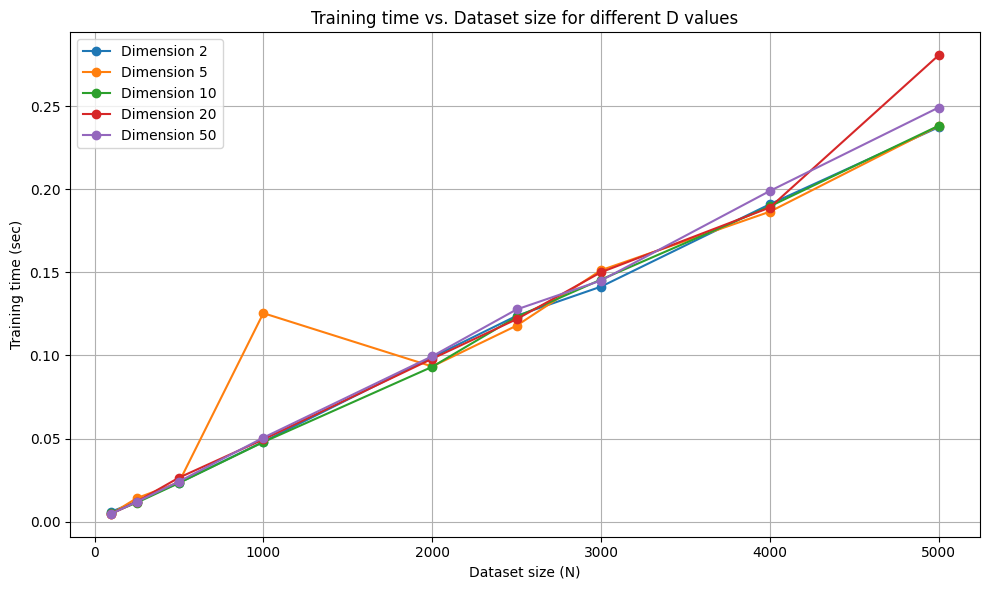

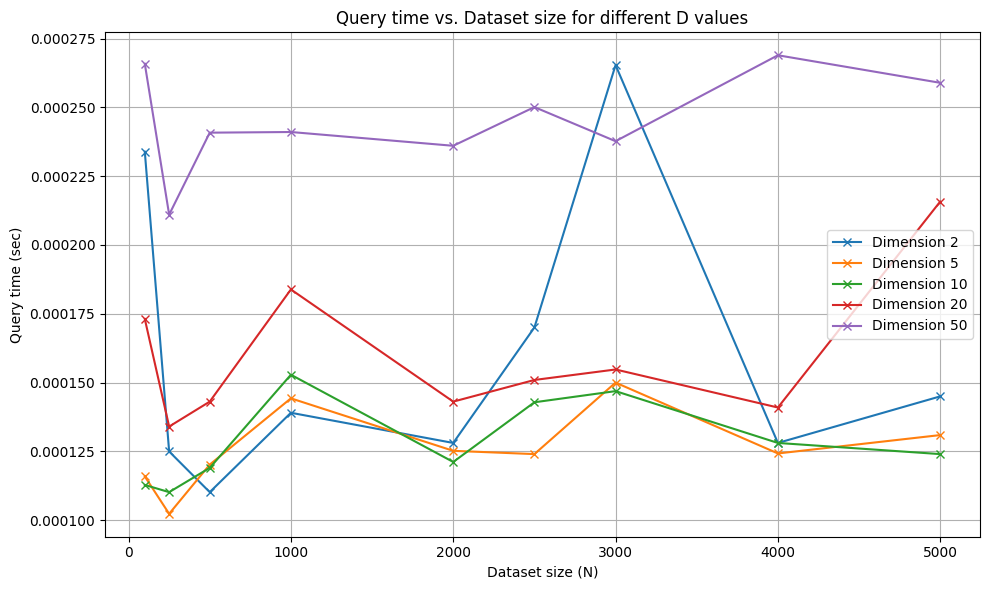

In [76]:


# Create arrays for training and query times for different dimensions
training_times_LSH = np.zeros((len(N_values), len(D_values)))
query_times_LSH = np.zeros((len(N_values), len(D_values)))

# Fill the arrays with data from performance_results
for i, N in enumerate(N_values):
    for j, D in enumerate(D_values):
        entry = next((x for x in performance_results if x['N'] == N and x['D'] == D), None)
        if entry:
            training_times_LSH[i, j] = entry['approx_train_time']
            query_times_LSH[i, j] = entry['approx_query_time']

# Plot Training time vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, training_times_LSH[:, j], marker='o', label=f'Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Training time (sec)')
plt.title('Training time vs. Dataset size for different D values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Query time vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, query_times_LSH[:, j], marker='x', label=f'Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Query time (sec)')
plt.title('Query time vs. Dataset size for different D values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


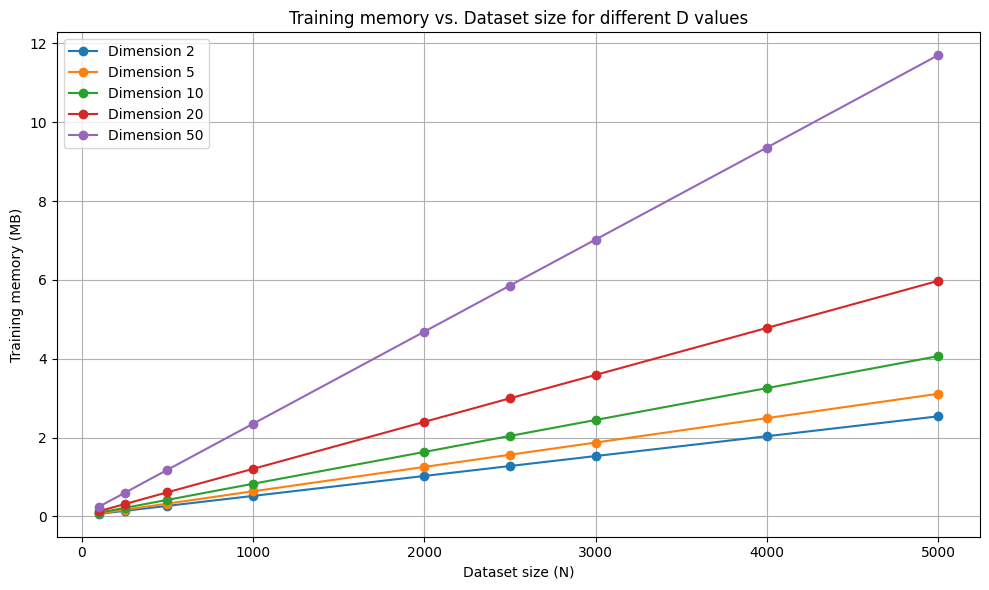

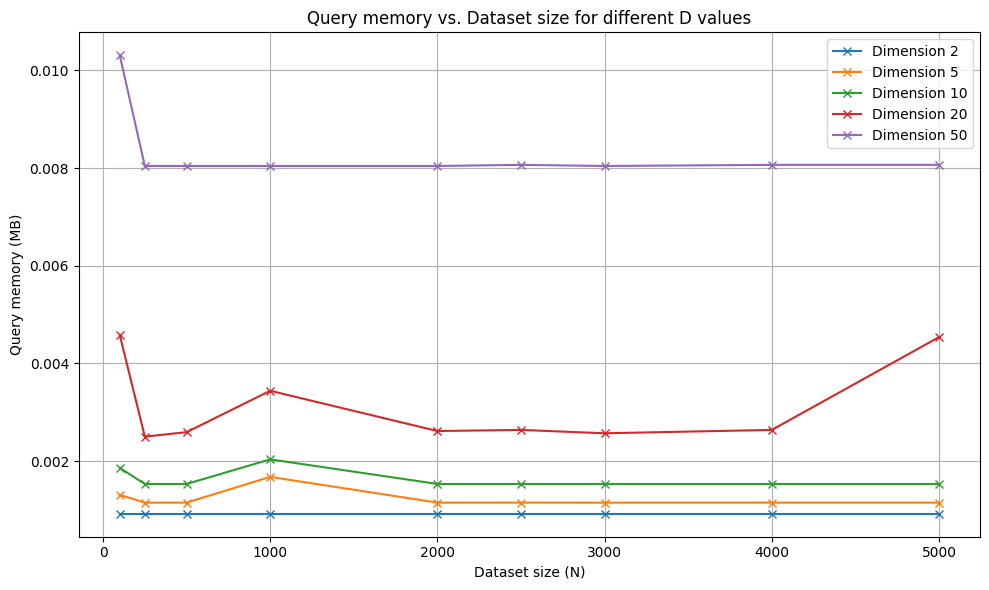

In [77]:
# Create arrays for memory usage for different dimensions
memory_train_LSH = np.zeros((len(N_values), len(D_values)))
memory_query_LSH = np.zeros((len(N_values), len(D_values)))

# Fill the arrays with data from performance_results
for i, N in enumerate(N_values):
    for j, D in enumerate(D_values):
        entry = next((x for x in performance_results if x['N'] == N and x['D'] == D), None)
        if entry:
            memory_train_LSH[i, j] = entry['approx_train_memory'] / (1024 * 1024)  # Convert to MB
            memory_query_LSH[i, j] = entry['approx_query_memory'] / (1024 * 1024)  # Convert to MB

# Plot Training memory vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, memory_train_LSH[:, j], marker='o', label=f'Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Training memory (MB)')
plt.title('Training memory vs. Dataset size for different D values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Query memory vs Dataset size (N) for different D values
plt.figure(figsize=(10, 6))
for j, D in enumerate(D_values):
    plt.plot(N_values, memory_query_LSH[:, j], marker='x', label=f'Dimension {D}')
plt.xlabel('Dataset size (N)')
plt.ylabel('Query memory (MB)')
plt.title('Query memory vs. Dataset size for different D values')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
def visualize_missed_neighbors(N, K,data,query_point):
    

    # Custom KDTree (approximate)
    approx_tree = kd_tree.KDTree()
    approx_tree.fit(data)
    approx_neighbours = np.array(approx_tree.predict(query_point, k=K))
    
    # Sklearn NearestNeighbors (exact brute-force)
    exact_tree = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(data)
    exact_dists, exact_idx = exact_tree.kneighbors(query_point.reshape(1, -1))

    # Find missed neighbors
    exact_neighbours = data[exact_idx[0]]  # Get exact neighbor points from data
    missed_neighbours = []  # List to store missed neighbors' indices

    # Loop through exact neighbors and check if they are in the approximate neighbors
    for i in range(K):
        # Check if the current exact neighbor exists in the approximate neighbors
        if not any(np.all(exact_neighbours[i] == approx_neighbours, axis=1)):
            missed_neighbours.append(exact_idx[0][i])  # Store the index of missed neighbor
    
    missed_neighbours = np.array(missed_neighbours, dtype=int)  # Ensure integer type for indexing

    # Print missed neighbors (optional)
    print("Missed Neighbours:", missed_neighbours)

    # Visualize the missed neighbors
    plt.scatter(data[:, 0], data[:, 1], label='Data points', c='blue', alpha=0.5)
    plt.scatter(data[exact_idx[0], 0], data[exact_idx[0], 1], label='Exact neighbors', c='green')

    # Scatter missed neighbors (ensure indexing is correct)
    plt.scatter(data[missed_neighbours, 0], data[missed_neighbours, 1], label='Missed neighbors', c='red', marker='x')
    plt.scatter(approx_neighbours[:, 0], approx_neighbours[:, 1], label='Approx neighbors', c='orange', marker='^')

    # Scatter query point
    plt.scatter(query_point[0], query_point[1], label='Query point', c='black')

    plt.legend()
    plt.show()

In [79]:
N=200
K=10
data = np.random.rand(N, 2)  # Generate a 2D dataset
query_point = np.random.rand(1, 2)  # Random query point

(200, 2)
Missed Neighbours: [139 183  51  85]


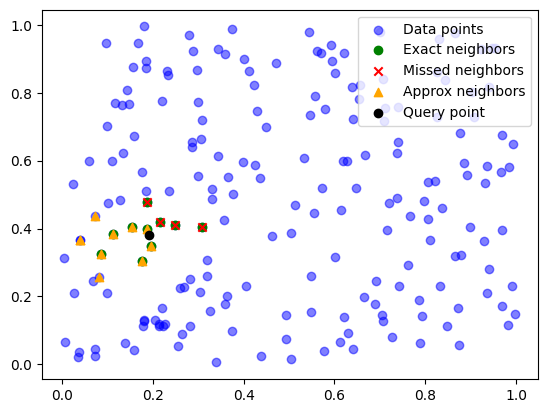

In [80]:

# Visualize missed neighbors for 2D dataset

query_point = query_point.flatten()
visualize_missed_neighbors(200, 10,data,query_point)


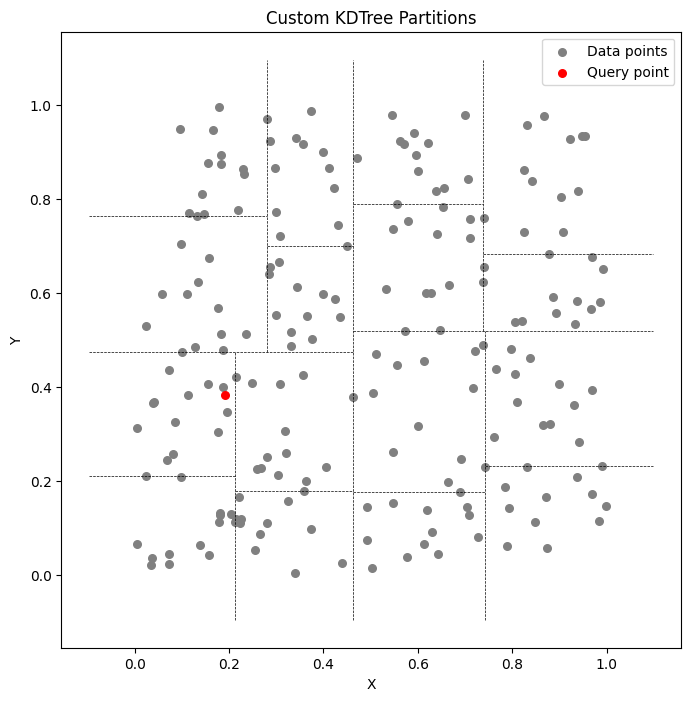

In [81]:
def plot_custom_kd_tree_partitions(node, xlim, ylim, depth=0, max_depth=5):
    """Recursively plot partitions for the custom KDTree with given maximum depth."""
    if node is None:
        return
    
    # Stop partitioning further if the depth exceeds the specified maximum depth - 1
    if depth >= max_depth - 1:
        return

    # Check if the node is a SplitNode
    if isinstance(node, kd_tree.SplitNode):
        split_feature = node.split_feature
        split_value = node.split_value

        # Draw vertical or horizontal lines based on the split feature
        if split_feature == 0:  # Vertical split for x feature
            plt.plot([split_value, split_value], ylim, 'k--', linewidth=0.5)
            plot_custom_kd_tree_partitions(node.left, [xlim[0], split_value], ylim, depth + 1, max_depth)
            plot_custom_kd_tree_partitions(node.right, [split_value, xlim[1]], ylim, depth + 1, max_depth)
        elif split_feature == 1:  # Horizontal split for y feature
            plt.plot(xlim, [split_value, split_value], 'k--', linewidth=0.5)
            plot_custom_kd_tree_partitions(node.left, xlim, [ylim[0], split_value], depth + 1, max_depth)
            plot_custom_kd_tree_partitions(node.right, xlim, [split_value, ylim[1]], depth + 1, max_depth)

def visualize_custom_kd_tree_with_partitions(data, max_depth=5):
    """Visualize the custom KDTree with partitions."""
    # Build the custom KDTree using your build_tree function
    approx_tree = kd_tree.build_tree(data)
    
    # Plot data points
    plt.figure(figsize=(8, 8))
    plt.scatter(data[:, 0], data[:, 1], c='gray', s=30, label='Data points')
    plt.scatter(query_point[0],query_point[1], c='red', s=30, label='Query point')
    
    # Set xlim and ylim based on the data range
    xlim = [np.min(data[:, 0]) - 0.1, np.max(data[:, 0]) + 0.1]
    ylim = [np.min(data[:, 1]) - 0.1, np.max(data[:, 1]) + 0.1]
    
    # Plot partitions up to the specified max_depth - 1
    plot_custom_kd_tree_partitions(approx_tree, xlim, ylim, max_depth=max_depth)
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    # plt.grid(True)
    plt.title("Custom KDTree Partitions")
    plt.show()

# Example usage with a 2D random dataset
# data = np.random.rand(100, 2)  # 100 points in 2D space
visualize_custom_kd_tree_with_partitions(data, max_depth=5)  # Adjust max_depth as desired
